# Boundary-Layer Meteorology


<img src="img/eddy_foto.jpeg" height="300">

Photo:LICOR

In the case you want a nice video explaining eddy covarice and the wider context have a look at: https://www.youtube.com/watch?v=CR4Anc8Mkas

## Turbulent Transport (Reynolds Averaging)

In [4]:
#read HDF5 file containing some eddy covariance data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hdf = pd.read_hdf('data/eddy_store.h5')

In [5]:
#display dataframe
hdf

,DATAH,Sequence Number,Diagnostic Value,Date,Time,CO2 (mmol m^3),H2O (mmol m^3),Temperature (C),Pressure (kPa),Aux 1 - U (m s),...,H2O (mmol mol),AGC,CH4 (umol mol),CH4 (mmol m^3),CH4 Temperature,CH4 Pressure,Signal Strength (RSSI),CH4 Diagnostic Value,CH4 Drop Rate (%),CHK\n
0,DATA,304393271,245,2011-04-05,14:30:00:000,15.9575,314.38,8.46843,96.1733,1.02756,...,7.65333,37.5,4.00902,0.17653,7.51835,96.0597,25.4347,143,0,127\n
1,DATA,304393301,245,2011-04-05,14:30:00:100,15.9621,314.571,8.4697,96.171,1.10322,...,7.65843,37.5,4.13578,0.182083,7.55243,96.0597,25.3704,143,0,65\n
2,DATA,304393331,245,2011-04-05,14:30:00:200,15.9577,315.525,8.4697,96.1618,1.14433,...,7.68143,37.5,4.17825,0.183934,7.57425,96.0557,25.3981,143,0,145\n
3,DATA,304393361,245,2011-04-05,14:30:00:300,15.9672,315.742,8.46843,96.1757,1.15553,...,7.68702,37.5,4.10083,0.18051,7.59415,96.0569,25.4183,143,0,187\n
4,DATA,304393391,245,2011-04-05,14:30:00:400,15.9654,315.613,8.46843,96.1664,1.4227,...,7.68344,37.5,4.19323,0.184569,7.60327,96.058,25.3172,143,0,29\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,DATA,304933121,246,2011-04-05,14:59:59:500,15.696,330.611,10.7876,96.1872,0.0700607,...,8.11302,43.75,2.39969,0.104427,10.0984,96.0707,25.5399,143,0,26\n
17996,DATA,304933151,246,2011-04-05,14:59:59:600,15.6868,331.347,10.7903,96.1872,0.353106,...,8.1314,43.75,2.35861,0.102637,10.1023,96.0684,25.5608,143,0,19\n
17997,DATA,304933181,246,2011-04-05,14:59:59:700,15.6873,331.007,10.7929,96.1918,0.609061,...,8.12414,43.75,2.41288,0.104992,10.1162,96.0696,25.5352,143,0,17\n
17998,DATA,304933211,246,2011-04-05,14:59:59:800,15.6856,331.188,10.7942,96.178,0.882765,...,8.12941,43.75,2.59906,0.113113,10.0796,96.0702,25.5594,143,0,187\n


Since the data table is huge some parts in the middle are automaticaly truncated. In order to display the all columns we need to change the display option. We can do this within a fuction so that this is option is always available if needed.

In [6]:
#define function to display full dataframe table
from IPython.display import display
def display_full(x):
    pd.set_option('display.max_columns', x.shape[1])
    display(x)
    pd.reset_option('display.max_columns')

In [7]:
display_full(hdf)
#print all keys of the dataframe
hdf.keys()

,DATAH,Sequence Number,Diagnostic Value,Date,Time,CO2 (mmol m^3),H2O (mmol m^3),Temperature (C),Pressure (kPa),Aux 1 - U (m s),Aux 2 - V (m s),Aux 3 - W (m s),Aux 4 - Ts (C),CO2 (umol mol),H2O (mmol mol),AGC,CH4 (umol mol),CH4 (mmol m^3),CH4 Temperature,CH4 Pressure,Signal Strength (RSSI),CH4 Diagnostic Value,CH4 Drop Rate (%),CHK\n
0,DATA,304393271,245,2011-04-05,14:30:00:000,15.9575,314.38,8.46843,96.1733,1.02756,-7.07146,0.745446,10.7065,388.472,7.65333,37.5,4.00902,0.17653,7.51835,96.0597,25.4347,143,0,127\n
1,DATA,304393301,245,2011-04-05,14:30:00:100,15.9621,314.571,8.4697,96.171,1.10322,-7.44232,0.77783,10.6706,388.608,7.65843,37.5,4.13578,0.182083,7.55243,96.0597,25.3704,143,0,65\n
2,DATA,304393331,245,2011-04-05,14:30:00:200,15.9577,315.525,8.4697,96.1618,1.14433,-7.52172,0.572007,10.6928,388.49,7.68143,37.5,4.17825,0.183934,7.57425,96.0557,25.3981,143,0,145\n
3,DATA,304393361,245,2011-04-05,14:30:00:300,15.9672,315.742,8.46843,96.1757,1.15553,-7.47688,0.408532,10.7305,388.736,7.68702,37.5,4.10083,0.18051,7.59415,96.0569,25.4183,143,0,187\n
4,DATA,304393391,245,2011-04-05,14:30:00:400,15.9654,315.613,8.46843,96.1664,1.4227,-7.80663,0.224506,10.823,388.67,7.68344,37.5,4.19323,0.184569,7.60327,96.058,25.3172,143,0,29\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,DATA,304933121,246,2011-04-05,14:59:59:500,15.696,330.611,10.7876,96.1872,0.0700607,-4.9575,0.280243,13.0288,385.173,8.11302,43.75,2.39969,0.104427,10.0984,96.0707,25.5399,143,0,26\n
17996,DATA,304933151,246,2011-04-05,14:59:59:600,15.6868,331.347,10.7903,96.1872,0.353106,-5.09388,0.316986,13.0802,384.962,8.1314,43.75,2.35861,0.102637,10.1023,96.0684,25.5608,143,0,19\n
17997,DATA,304933181,246,2011-04-05,14:59:59:700,15.6873,331.007,10.7929,96.1918,0.609061,-5.25736,0.41258,13.1179,385.024,8.12414,43.75,2.41288,0.104992,10.1162,96.0696,25.5352,143,0,17\n
17998,DATA,304933211,246,2011-04-05,14:59:59:800,15.6856,331.188,10.7942,96.178,0.882765,-5.3489,0.482329,13.123,385.021,8.12941,43.75,2.59906,0.113113,10.0796,96.0702,25.5594,143,0,187\n


Index(['DATAH', 'Sequence Number', 'Diagnostic Value', 'Date', 'Time',
       'CO2 (mmol m^3)', 'H2O (mmol m^3)', 'Temperature (C)', 'Pressure (kPa)',
       'Aux 1 - U (m s)', 'Aux 2 - V (m s)', 'Aux 3 - W (m s)',
       'Aux 4 - Ts (C)', 'CO2 (umol mol)', 'H2O (mmol mol)', 'AGC',
       'CH4 (umol mol)', 'CH4 (mmol m^3)', 'CH4 Temperature', 'CH4 Pressure',
       'Signal Strength (RSSI)', 'CH4 Diagnostic Value', 'CH4 Drop Rate (%)',
       'CHK\n'],
      dtype='object')

In [9]:
#here we make a real time stamp from the records in table
import datetime
date_str = hdf['Date'] 
time_str = hdf['Time']
date_time = list(date_str + ' ' + time_str)
date_time = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S:%f') for date in date_time]

In [10]:
date_time

[datetime.datetime(2011, 4, 5, 14, 30),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 100000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 200000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 300000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 400000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 500000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 600000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 700000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 800000),
 datetime.datetime(2011, 4, 5, 14, 30, 0, 900000),
 datetime.datetime(2011, 4, 5, 14, 30, 1),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 100000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 200000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 300000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 400000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 500000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 600000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 700000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 800000),
 datetime.datetime(2011, 4, 5, 14, 30, 1, 900000),

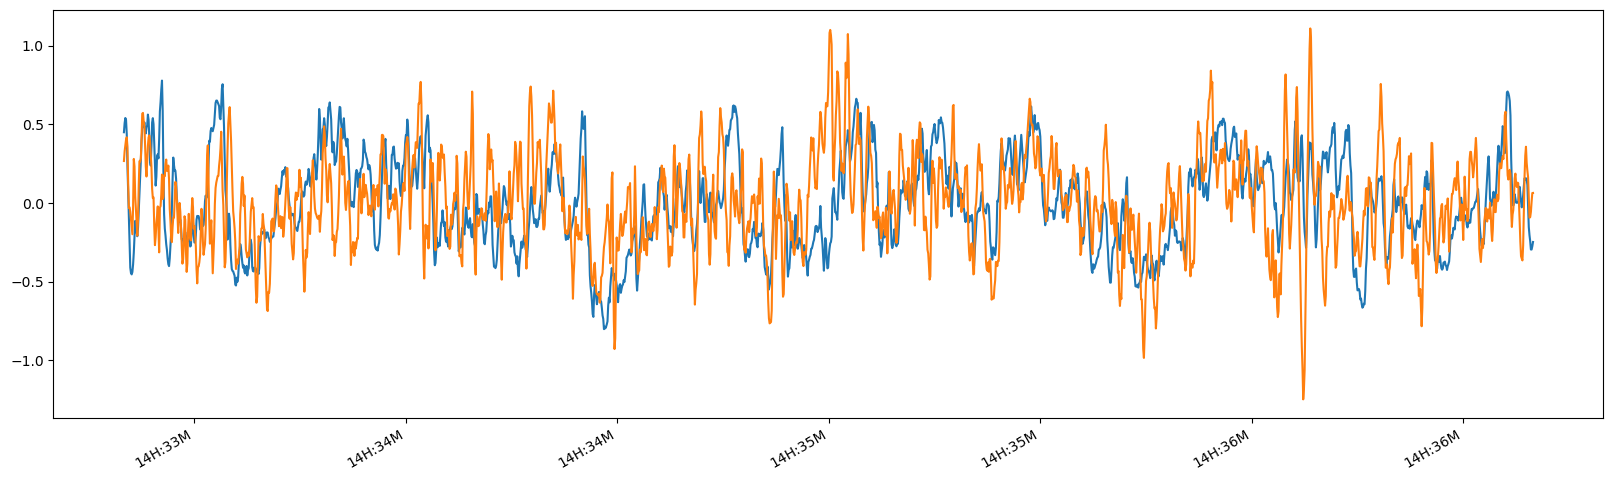

In [19]:
#plot temperature and vertical windspeed
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


#select sonic temperature from dataframe
Ts = list(hdf['Aux 4 - Ts (C)'])
#covert string to number
Ts = np.float_(Ts)
#select vertical wind speed
Ws = list(hdf['Aux 3 - W (m s)'])
#covert string to number
Ws = np.float_(Ws)

H2O = list(hdf['H2O (mmol m^3)'])
H2O = np.float_(H2O)

#select only a short period (3min)
s = 2000
e = s+2000
Ts = Ts[s:e]
Ws = Ws[s:e]
H2O = H2O[s:e]

t = date_time[s:e]
Ws = signal.detrend(Ws)
Ts = signal.detrend(Ts)

#plot the results
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))
plt.plot(t,Ts,t,Ws)
plt.gcf().autofmt_xdate()

Now we want to calaculate the covarice between sonic temperature $T_s$ and vertical wind speed $W_s$. Wikipedia can help us with the math (https://en.wikipedia.org/wiki/Covariance).

The covariance between two variables ($x$ and $y$) is defined as

$\Large cov(x,y)=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$,

where $\bar{x}$ and $\bar{y}$ are the averages, and $N$ is the lenght of the data record

In [11]:
#define function for calculating covarinace
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [12]:
TsWs = cov(Ts,Ws)
TsWs

0.03534835827583272

Now we can easily claculate the sensibel heat flux

The sensible heat flux ${\rm H}$ is defined as ${\rm H} = {\rm c_ p}  \rho_{\rm air} (\overline{W_s'T_s'})$, where ${\rm c_p}$ is the specific heat capacitiy of air, and $\rho_{\rm air}$ is the densitiy of air.

In [35]:
cp_air = 1005.7 #[J kg^-1 K^-1]

#simple assumtion
#select sonic temperature from dataframe
Ts = list(hdf['Aux 4 - Ts (C)'])
#covert string to number
Ts = np.float_(Ts)

#select only a short period ( e.g. 3min)
s = 2000
e = s+2000
Ts = Ts[s:e]
Tair_av = np.mean(Ts)
print('The average air temperature is: ' + str(Tair_av))
#simple look up appoach
air_density_av = 1.2466 #[kg m^-3] see table Wikipedia 10°C)

#more correct calculation of the air density
pressure = list(hdf['Pressure (kPa)'])
pressure = np.float_(pressure)*1000 #[Pa]
s = 2000
e = s+2000
pressure = pressure[s:e]
gas_constant_dry = 287.058 #[Pa K^-1 m^3 kg^-1]
air_density = pressure/(gas_constant_dry * (Ts+273.15)) #[kg m^-3] note that this is only the density of dry air. In reality we have to add the mass of water. For a first order estimate we ignor this here
#air_density_av = np.mean(air_density) #[kg m^-3]
print('The air density is: ' + str(air_density_av))

#TsWs [K m s^1]
H = cp_air*air_density_av*TsWs #[J s^-1 m^-2] -> [W m^-2]
print('The sensible heat flux H is: ' + str(H))


The average air temperature is: 11.3414391
The air density is: 1.2466
The sensible heat flux H is: 44.31643542818499


### Task 2:
    
- Calculate the momentum flux $\tau$ as which is defined as $\tau = -\rho_{\rm air} (\overline{W_s'U_s'})$.
    
- Calculate the latent heat flux ${\rm E_T}$ which is defined as ${\rm E_T} = {L_{\rm lg}} \rho_{\rm air} (\overline{W_s'p'})$, where ${L_{\rm lg}}$ is the latent heat of evaporation, and $p$ is the specific humidity. Note that you will have to calculate $p$ from the given molecular concentration of ${\rm H_2O}$ first.